In [1]:
import random
import numpy as np
from dataclasses import dataclass, field
import matplotlib.pyplot as plt

In [2]:
lA = 15
lD = 8

In [3]:
@dataclass
class Data:
    A: list[float] = field(default_factory=list)
    D: list[float] = field(default_factory=list)
    tA: list[float] = field(default_factory=list)
    tD: list[float] = field(default_factory=list)
    total_time: float = 0.0

In [4]:
def symulacja(lA, lD, taskN) -> Data:
    data = Data()
    for i in range(taskN):
        A = 0.0
        B = 0.0
        tA = -np.log(random.uniform(0, 1)) / lA
        tD = -np.log(random.uniform(0, 1)) / lD
        
        A = tA + np.sum(data.tA) 
        if i == 0:
            D = tA + tD
        else:
            D = max(data.D[-1], A) + tD
        
        print("Pojawilo sie zadanie ", i, " w czasie: ", A, " wykonano w czasie: ", D)
        
        data.A.append(A)
        data.D.append(D)
        data.tA.append(tA)
        data.tD.append(tD)
        
    data.total_time = np.max(data.D)
    return data
            
            
        

In [5]:
data = symulacja(lA, lD, 1000)

Pojawilo sie zadanie  0  w czasie:  0.006402105425375742  wykonano w czasie:  0.10088796274362562
Pojawilo sie zadanie  1  w czasie:  0.007628563983767991  wykonano w czasie:  0.3270876171295599
Pojawilo sie zadanie  2  w czasie:  0.05832791218426637  wykonano w czasie:  0.3548782523755735
Pojawilo sie zadanie  3  w czasie:  0.08894816238146623  wykonano w czasie:  0.48570132562788143
Pojawilo sie zadanie  4  w czasie:  0.1593114900611402  wykonano w czasie:  0.4893201683636444
Pojawilo sie zadanie  5  w czasie:  0.16532793105542384  wykonano w czasie:  0.6060186827928099
Pojawilo sie zadanie  6  w czasie:  0.17212440959427405  wykonano w czasie:  1.0619995936389048
Pojawilo sie zadanie  7  w czasie:  0.19411294118315772  wykonano w czasie:  1.1600895275410792
Pojawilo sie zadanie  8  w czasie:  0.21277647280205628  wykonano w czasie:  1.2971198024682995
Pojawilo sie zadanie  9  w czasie:  0.2702885881091974  wykonano w czasie:  1.304130353188526
Pojawilo sie zadanie  10  w czasie:  0.

### Liczba zadan w kolejce

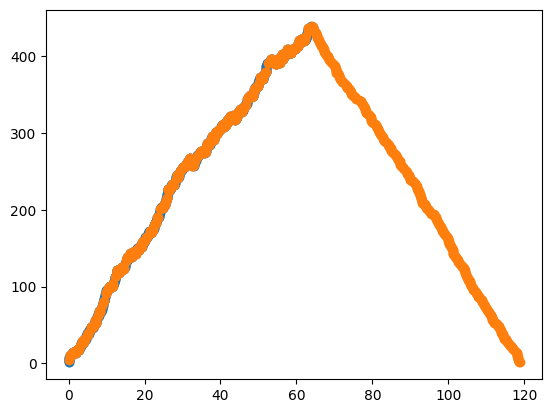

In [6]:
X1 = data.A
X2 = data.D
Y_kolejka = []
Y_wykonane = []



for time in data.A:
    suma_kolejka = 0
    for tin, tout in zip(data.A, data.D):
        if time >= tin and time <= tout:
            suma_kolejka+=1

    Y_kolejka.append(suma_kolejka)
    
for time in data.D:
    suma_wykonane = 0
    for tin, tout in zip(data.A, data.D):
        if time >= tin and time <= tout:
            suma_wykonane+=1
            
    Y_wykonane.append(suma_wykonane)

fig, ax = plt.subplots()
ax.scatter(X1, Y_kolejka)
ax.scatter(X2, Y_wykonane)


plt.show()

### Czas oczekiwania

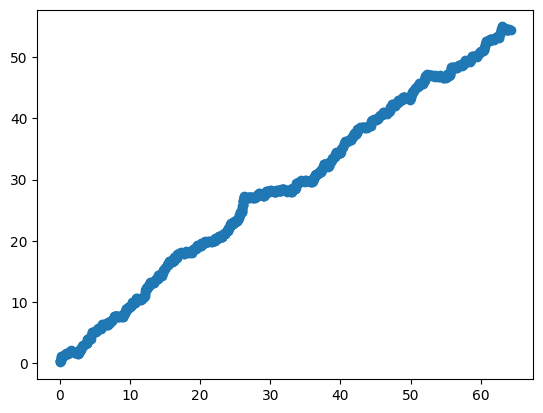

In [7]:
X = data.A
Y = np.array(data.D) - np.array(data.A)

fig, ax = plt.subplots()
ax.scatter(X, Y)

plt.show()

### Liczba wykonanych

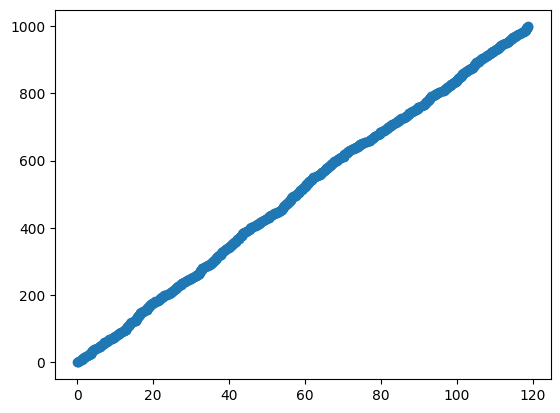

In [8]:
X = data.D
Y = range(len(data.D))


fig, ax = plt.subplots()
ax.scatter(X, Y)

plt.show()

### Wzory

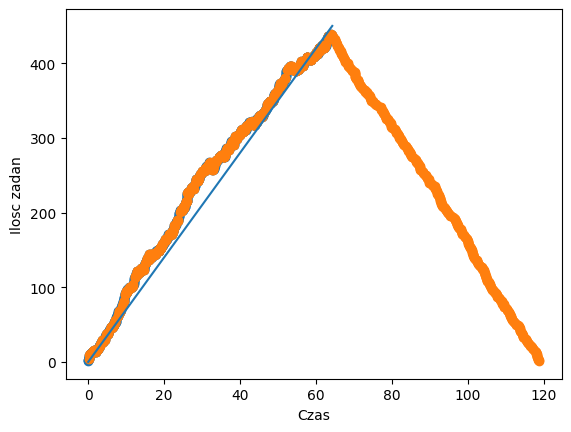

In [9]:
X1 = data.A
X2 = data.D
Y_kolejka = []
Y_wykonane = []



for time in data.A:
    suma_kolejka = 0
    for tin, tout in zip(data.A, data.D):
        if time >= tin and time <= tout:
            suma_kolejka+=1

    Y_kolejka.append(suma_kolejka)
    
for time in data.D:
    suma_wykonane = 0
    for tin, tout in zip(data.A, data.D):
        if time >= tin and time <= tout:
            suma_wykonane+=1
            
    Y_wykonane.append(suma_wykonane)
    
plt.scatter(X1, Y_kolejka)
plt.scatter(X2, Y_wykonane)

ldiff = lA - lD
diff_list = []
X = np.linspace(np.min(data.A), np.max(data.A), 1000)
Y = X*ldiff

plt.ylabel("Ilosc zadan")
plt.xlabel("Czas")
plt.plot(X, Y)
plt.show()

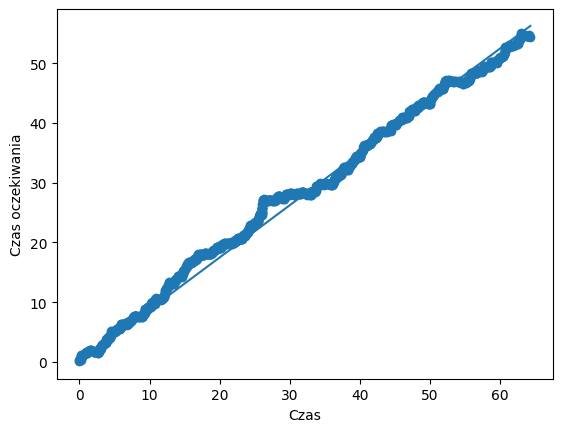

In [10]:
X = data.A
Y = np.array(data.D) - np.array(data.A)

plt.scatter(X, Y)

ldiff = (lA - lD) / lD
diff_list = []
X = np.linspace(np.min(data.A), np.max(data.A), 1000)
Y = X*ldiff
plt.ylabel("Czas oczekiwania")
plt.xlabel("Czas")
plt.plot(X, Y)
plt.show()